In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_data = '../datasets/mnist.npz'

In [3]:
def load_train_test_data(path):
    with np.load(path) as f:
        x_train = f['x_train']
        x_test = f['x_test']
        y_train = f['y_train']
        y_test = f['y_test']
    return x_train, x_test, y_train, y_test

In [48]:
x_train, x_test, y_train, y_test = load_train_test_data(path_to_data)

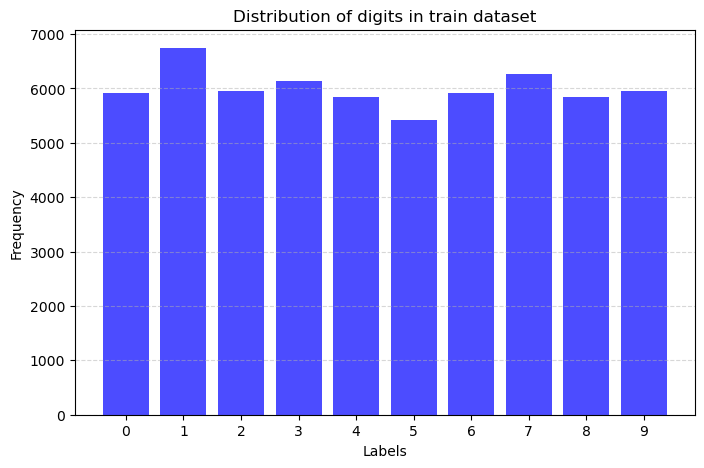

In [43]:
label_counts = [np.sum(y_train == digit) for digit in range(10)]

plt.figure(figsize=(8, 5))
plt.bar(range(10), label_counts, color='blue', alpha=0.7)

plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of digits in train dataset')
plt.xticks(range(10))
plt.grid(axis='y', linestyle="--", alpha=0.5)

plt.show()

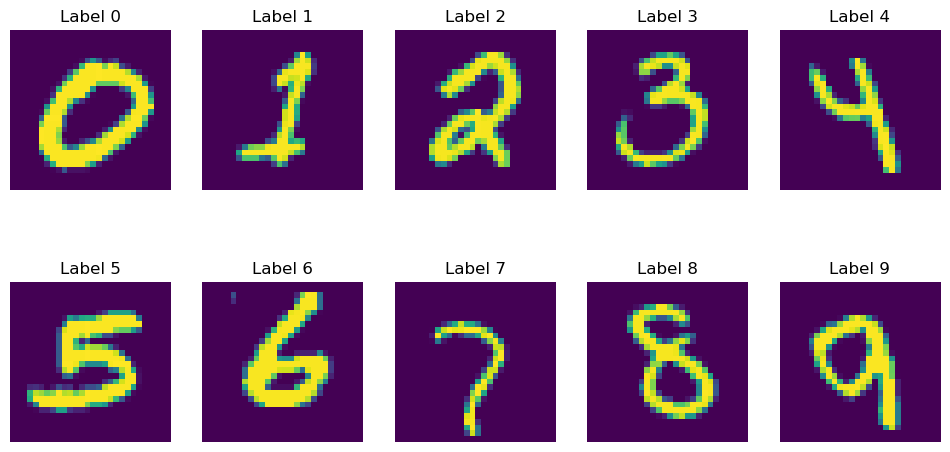

In [82]:
plt.figure(figsize=(12, 12))

for i in range(10):
    indices = np.where(y_train == i)[0]
    
    index = np.random.choice(indices)
    
    plt.subplot(i // 5 + 1, 5, i+1)
    plt.imshow(x_train[index])
    plt.title(f'Label {i}')
    plt.axis('off')
    
plt.show()

In [86]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [40]:
class LinearRegression:
    def __init__(self):
        self.coefs = None,
        self.intercept = None
    
    def fit(self, X, y):
        X_b = np.c_[np.ones(X.shape[0]), X]
        beta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        
        self.intercept, self.coefs = beta[0], beta[1:]
    
    def predict(self, X):
        return self.intercept + X @ self.coefs

In [41]:
models = []

for digit in range(10):
    print('Training model for digit', digit)
    y_binary = y_train == digit
    
    model = LinearRegression()
    model.fit(x_train, y_binary)
    models.append(model)
    

Training model for digit 0
Training model for digit 1
Training model for digit 2
Training model for digit 3
Training model for digit 4
Training model for digit 5
Training model for digit 6
Training model for digit 7
Training model for digit 8
Training model for digit 9


In [88]:
pred = np.zeros((x_test.shape[0], 10))

for i, model in enumerate(models):
    pred[:, i] = model.predict(x_test)

pred_digits = np.argmax(pred, axis=1)

accuracy = np.mean(y_test == pred_digits)
print(f'Accuracy score: {accuracy}')

Accuracy score: 0.8603
